In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, ast

sns.set()
%matplotlib inline

Without parse_dates, the column "Year" will be loaded in float format

In [2]:
data = pd.read_csv('data/Homework 2 Cars.csv',parse_dates=["Year"])

Use pandas profiling to do a quick exploratory data analysis (A picture is worth a thousand words!)

# <span style="color: blue">**1. Data Loading and Profiling** </span>

In [3]:
import sys
!{sys.executable} -m pip install pandas-profiling

You should consider upgrading via the 'C:\Users\frede\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas_profiling as pf

In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title = "Pandas Profiling Report", html={'style': {'full_width': True}})
#profile.to_file(output_file='output.html')

In [6]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
data.head(10)

Car Make   Car Model Dealer or Individual    Price  Year  \
0   Toyota        Rav4               Dealer  21300.0  2016   
1   Toyota        Rav4               Dealer  10995.0  2009   
2   Toyota  Highlander               Dealer  21990.0  2012   
3   Toyota     Corolla           Individual  15590.0  2013   
4   Toyota       Camry               Dealer  19990.0  2012   
5   Toyota  Highlander               Dealer  24990.0  2013   
6   Toyota       Camry               Dealer  13888.0  2007   
7   Toyota       Camry               Dealer  21990.0  2017   
8   Toyota     Corolla               Dealer  15880.0  2013   
9   Toyota        Rav4               Dealer  29900.0  2019   

                     Location   Mileage Doors   Color Transmission  \
0            Walnut Creek, CA   90441.0     4   White    Automatic   
1        1125 Detroit Ave, CA  172844.0     4   White    Automatic   
2  Lower Bottoms, Oakland, CA   75000.0     4   White    Automatic   
3                  Pittsburgh   79767.0     4  Silver    Automatic   
4           San Francisco, CA   76000.0     4    Blue    Automatic   
5      1700 E Bayshore Rd, CA   75000.0     4   Black    Automatic   
6     3368 El Camino Real, CA  100855.0     4   Black    Automatic   
7                         NaN   49019.0     4   Black    Automatic   
8     3368 El Camino Real, CA   89580.0     4  Silver    Automatic   
9                         NaN   55483.0     4   white    Automatic   

                VIN#                      Engine  \
0  2T3WFREV0GW274936            2.5 L 4-cylinder   
1  JTMBK31V095081967               V6, 3.5 Liter   
2  5TDBK3EH9CS140312               V6, 3.5 Liter   
3  2T1BU4EE6DC074253   1.8-Liter 4-Cylinder DOHC   
4  5TDZA3EH0CS021002            4-Cyl, 2.7 Liter   
5  5TDDK3EH5DS278391               V6, 3.5 Liter   
6  JTNBB46K673029414  I4 2.4L Natural Aspiration   
7  4T1BF1FK5HU395265            4-Cyl, 2.5 Liter   
8  5YFBU4EE3DP202495  I4 1.8L Natural Aspiration   
9  2T3P1RFV3KW029171                 4-Cyl, 2.5L   

                                         Description  \
0  The automatic transmission makes driving easie...   
1  Limited Extra Value PKG W/Navigation\rinc: day...   
2  Vehicle Info for Stock# 2001887828\rTrim: Spor...   
3                                                NaN   
4  Vehicle Info for Stock# 2001946064\rTrim: Spor...   
5  Vehicle Info for Stock# 2001823556\rTrim: Limi...   
6  Year: 2007\rMake: Toyota\rModel: Camry Hybrid\...   
7                                                NaN   
8  Year: 2013\rMake: Toyota\rModel: Corolla\rSeri...   
9                                                NaN   

                                            Web link  
0  https://sfbay.craigslist.org/eby/ctd/753307708...  
1  https://sfbay.craigslist.org/eby/ctd/753307624...  
2  https://sfbay.craigslist.org/eby/ctd/753332603...  
3  https://www.carvana.com/vehicle/2417328#inspec...  
4  https://sfbay.craigslist.org/sfc/ctd/753333249...  
5  https://sfbay.craigslist.org/sby/ctd/753328645...  
6  https://sfbay.craigslist.org/scz/ctd/753335031...  
7            https://www.carvana.com/vehicle/2447790  
8  https://sfbay.craigslist.org/eby/ctd/753334924...  
9            https://www.carvana.com/vehicle/2423338

In [8]:
len(data)

859

In [9]:
data.dtypes.to_dict()

{'Car Make': dtype('O'),
 'Car Model': dtype('O'),
 'Dealer or Individual': dtype('O'),
 'Price': dtype('float64'),
 'Year': dtype('O'),
 'Location': dtype('O'),
 'Mileage': dtype('float64'),
 'Doors': dtype('O'),
 'Color': dtype('O'),
 'Transmission': dtype('O'),
 'VIN#': dtype('O'),
 'Engine': dtype('O'),
 'Description': dtype('O'),
 'Web link': dtype('O')}

In [10]:
data.rename(columns = {
    col : f"{col} ({dtype})"
    for col, dtype in data.dtypes.to_dict().items()
}).sample(20)

Car Make (object) Car Model (object) Dealer or Individual (object)  \
232            Toyota            Corolla                        Dealer   
253            Toyota              Camry                    Individual   
203            Toyota              Camry                        Dealer   
303            Toyota               Rav4                        Dealer   
235            Toyota            Corolla                        Dealer   
438            Toyota            Corolla                        Dealer   
367            Toyota               Rav4                        Dealer   
740            Toyota               Rav4                        Dealer   
5              Toyota         Highlander                        Dealer   
45             Toyota               Rav4                        Dealer   
151            Toyota               Rav4                        Dealer   
428            Toyota         Highlander                        Dealer   
830            Toyota         Highlander                        Dealer   
610            Toyota              Camry                        Dealer   
349            Toyota              Camry                        Dealer   
377            Toyota            Corolla                        Dealer   
85             Toyota         Highlander                    Individual   
510            Toyota              Camry                        Dealer   
370            Toyota            Corolla                        Dealer   
554            Toyota         Highlander                        Dealer   

     Price (float64) Year (object)                     Location (object)  \
232          13999.0          2017                    EchoPark St. Louis   
253           9500.0          2013                          Brewster, NY   
203          24998.0          2018                     CarMax Laurel, MD   
303          25990.0          2019                       Little Rock, AR   
235          17990.0          2014                                   NaN   
438          15994.0          2015  9772 Fairfax Blvd, Fairfax, VA 22031   
367          32552.0          2019                      Old Saybrook, CT   
740          19990.0          2013                             Heath, OH   
5            24990.0          2013                1700 E Bayshore Rd, CA   
45           34998.0          2020                          Columbus, OH   
151          19998.0          2013                         Rochester, NY   
428          19999.0          2013                        Union City, NJ   
830          20590.0          2012                       Bridgeville, PA   
610          23998.0          2017                    Cleveland East, OH   
349          21590.0          2015                       Bridgeville, PA   
377          21990.0          2020                              Oklahoma   
85           30590.0          2016                      lorain, oh 44053   
510           8490.0          2014                                    OH   
370          20600.0          2019                        Pittsburgh, PA   
554          19590.0          2011                       Bridgeville, PA   

     Mileage (float64) Doors (object)           Color (object)  \
232           112208.0              4                    White   
253           118000.0              4                   silver   
203            64000.0              4                    Brown   
303            35637.0              4                    White   
235            72604.0              4                    Green   
438            83005.0              4  Classic Silver Metallic   
367            23939.0              4                     Gray   
740            52312.0              4                      Red   
5              75000.0              4                    Black   
45             16000.0              4                    Black   
151            96000.0              4               Green/Gray   
428            50810.0              4                    Whi

In [11]:
data.describe()

Price        Mileage
count    851.000000     847.000000
mean   23330.728555   62204.606848
std     8143.782705   38778.285224
min     1950.000000       0.000000
25%    17990.000000   33284.000000
50%    21998.000000   57344.000000
75%    28165.000000   86759.000000
max    69926.000000  225700.000000

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Car Make              855 non-null    object 
 1   Car Model             858 non-null    object 
 2   Dealer or Individual  854 non-null    object 
 3   Price                 851 non-null    float64
 4   Year                  857 non-null    object 
 5   Location              826 non-null    object 
 6   Mileage               847 non-null    float64
 7   Doors                 855 non-null    object 
 8   Color                 852 non-null    object 
 9   Transmission          852 non-null    object 
 10  VIN#                  832 non-null    object 
 11  Engine                814 non-null    object 
 12  Description           649 non-null    object 
 13  Web link              855 non-null    object 
dtypes: float64(2), object(12)
memory usage: 94.1+ KB


### As we can see from the above table, there is 858 entries, but only 855 car make and 851 price, we can conclude that there are missing data from the data source.

# <span style="color: blue">**2. Data Cleaning** </span>
1. Address missing data
2. Duplicate data identify and fix
3. Address poorly formed data

In [13]:
# check the number of unique classes of each attributes 
data.nunique()

Car Make                  1
Car Model                 4
Dealer or Individual      2
Price                   386
Year                     23
Location                374
Mileage                 559
Doors                     5
Color                   144
Transmission              2
VIN#                    623
Engine                  189
Description             604
Web link                693
dtype: int64

### By analyzing the unique classes for categorical variables, we can see that there is 623 unique VIN# and in total there is 858 data entries. We can conclude that some VIN# showed up multiple times. 

## <span style="color: blue">**2.1 Missing Data** </span>

In [14]:
# Check missing - NaN or NULL
data.isna().sum()

Car Make                  4
Car Model                 1
Dealer or Individual      5
Price                     8
Year                      2
Location                 33
Mileage                  12
Doors                     4
Color                     7
Transmission              7
VIN#                     27
Engine                   45
Description             210
Web link                  4
dtype: int64

### VIN# is the key value for this dataset, and entries without a VIN# need to be removed.  As this analysis is for Toyota, entries without Car Make need to be removed.  Another option would be to check the web link of those data entries and modify data manually. 

In [15]:
# subset: define in which columns to look for missing values.
data1 = data \
    .dropna(subset = ["Car Make", "VIN#"]) 

## <span style="color: blue">**2.2 Duplicate Data** </span>

In [16]:
# getting the total number of duplicates
data1.duplicated().sum()

6

### Same cars maybe listed on multiple sites with same or different price 

### <span style="color: blue">**2.2.1 Identify Duplicate Data** </span>

In [17]:
data1[data1.duplicated(keep=False)].sort_values(by=['VIN#'])  # false give us the duplicate rows 

Car Make   Car Model Dealer or Individual    Price  Year  \
326   Toyota     Corolla           Individual  21998.0  2017   
614   Toyota     Corolla           Individual  21998.0  2017   
164   Toyota        Rav4               Dealer  29990.0  2019   
352   Toyota        Rav4               Dealer  29990.0  2019   
750   Toyota       Camry               Dealer  16990.0  2012   
753   Toyota       Camry               Dealer  16990.0  2012   
749   Toyota       Camry               Dealer  19590.0  2016   
846   Toyota       Camry               Dealer  19590.0  2016   
812   Toyota  Highlander               Dealer  21590.0  2012   
814   Toyota  Highlander               Dealer  21590.0  2012   
790   Toyota     Corolla               Dealer  17590.0  2013   
791   Toyota     Corolla               Dealer  17590.0  2013   

              Location  Mileage Doors  Color Transmission               VIN#  \
326         Dayton, OH  60000.0     4    Red    Automatic  2T1BURHE3HC834539   
614         Dayton, OH  60000.0     4    Red    Automatic  2T1BURHE3HC834539   
164    Bridgeville, PA  55483.0     4  White    Automatic  2T3P1RFV3KW029171   
352    Bridgeville, PA  55483.0     4  White    Automatic  2T3P1RFV3KW029171   
750           OH 43056  91942.0     4   Gray    Automatic  4T1BF1FK3CU082059   
753           OH 43056  91942.0     4   Gray    Automatic  4T1BF1FK3CU082059   
749    Bridgeville, PA  54889.0     4  Beige    Automatic  4T4BF1FK1GR564072   
846    Bridgeville, PA  54889.0     4  Beige    Automatic  4T4BF1FK1GR564072   
812    Bridgeville, PA  78025.0     4  white    Automatic  5TDBK3EH8CS096898   
814    Bridgeville, PA  78025.0     4  white    Automatic  5TDBK3EH8CS096898   
790  Oklahoma City, OK  57445.0     4  White    Automatic  5YFBU4EE5DP080805   
791  Oklahoma City, OK  57445.0     4  White    Automatic  5YFBU4EE5DP080805   

               Engine                                        Description  \
326  4-cyl, Gas, 1.8L  Single Owner\rReported by AutoCheck�. View His...   
614  4-cyl, Gas, 1.8L  Single Owner\rReported by AutoCheck�. View His...   
164       4-Cyl, 2.5L                                                NaN   
352       4-Cyl, 2.5L                                                NaN   
750       4-Cyl, 2.5L  ENTERTAINMENT AND INSTRUMENTATION\rBluetooth W...   
753       4-Cyl, 2.5L  ENTERTAINMENT AND INSTRUMENTATION\rBluetooth W...   
749       4-Cyl, 2.5L                                                NaN   
846       4-Cyl, 2.5L                                                NaN   
812     V6, 3.5 Liter  V6, 3.5 Liter\rBeige Interior Color\rWhite Ext...   
814     V6, 3.5 Liter  V6, 3.5 Liter\rBeige Interior Color\rWhite Ext...   
790               NaN                                                NaN   
791               NaN                                                NaN   

                                    Web link  
326      https://www.carmax.com/car/22958295  
614      https://www.carmax.com/car/22958295  
164  https://www.carvana.com/vehicle/2423338  
352  https://www.carvana.com/vehicle/2423338  
750  https://www.carvana.com/vehicle/2473478  
753  https://www.carvana.com/vehicle/2473478  
749  https://www.carvana.com/vehicle/2484186  
846  https://www.carvana.com/vehicle/2484186  
812  https://www.carvana.com/vehicle/2450535  
814  https://www.carvana.com/vehicle/2450535  
790  https://www.carvana.com/vehicle/2474456  
791  https://www.carvana.com/vehicle/2474456

### <span style="color: blue">**2.2.2 Drop duplicates except for the last occurrence** </span>

In [18]:
data2 = data1.drop_duplicates(keep = "last")
data2.duplicated().sum()
# this secetion's code is adapted from this class's demo

0

## <span style="color: blue">**2.3 Reformat Data** </span>

### <span style="color: blue">**2.3.1 Convert binary categorical variable to 0 and 1** </span>

In [19]:
# Data of Dealer or Individual is converted into Binary Data
df_A = pd.get_dummies(data2["Dealer or Individual"])
df_A

Dealer  Individual
0         1           0
1         1           0
2         1           0
3         0           1
4         1           0
..      ...         ...
850       1           0
851       1           0
852       1           0
853       0           1
854       0           1

[822 rows x 2 columns]

In [20]:
# Binary Data is Concatenated into Dataframe
df_B = pd.concat((df_A, data2), axis=1)

In [21]:
# Dealer or Individual column is dropped
df_B = df_B.drop(["Dealer or Individual"], axis=1)
 
# We want Individual = 0 and Dealer = 1 So we drop Individual column here
df_B = df_B.drop(["Individual"], axis=1)
 
# Rename the Column
data3 = df_B.rename(columns={"Dealer or Individual": "Dealer"})

# This section's code is based on: https://www.projectpro.io/recipes/convert-categorical-variables-into-numerical-variables-in-python

In [22]:
data3

Dealer Car Make   Car Model    Price  Year                    Location  \
0         1   Toyota        Rav4  21300.0  2016            Walnut Creek, CA   
1         1   Toyota        Rav4  10995.0  2009        1125 Detroit Ave, CA   
2         1   Toyota  Highlander  21990.0  2012  Lower Bottoms, Oakland, CA   
3         0   Toyota     Corolla  15590.0  2013                  Pittsburgh   
4         1   Toyota       Camry  19990.0  2012           San Francisco, CA   
..      ...      ...         ...      ...   ...                         ...   
850       1   Toyota  Highlander  14849.0  2008                McMurray, PA   
851       1   Toyota     Corolla  19900.0  2019               Uniontown, PA   
852       1   Toyota       Camry  15335.0  2012               White Oak, PA   
853       0   Toyota        Rav4  28152.0  2020             Murrysville, PA   
854       0   Toyota        Rav4  18863.0  2014                         NaN   

      Mileage Doors                   Color Transmission               VIN#  \
0     90441.0     4                   White    Automatic  2T3WFREV0GW274936   
1    172844.0     4                   White    Automatic  JTMBK31V095081967   
2     75000.0     4                   White    Automatic  5TDBK3EH9CS140312   
3     79767.0     4                  Silver    Automatic  2T1BU4EE6DC074253   
4     76000.0     4                    Blue    Automatic  5TDZA3EH0CS021002   
..        ...   ...                     ...          ...                ...   
850   79824.0     4         Wave Line Pearl    Automatic  JTEES42A982077927   
851   41723.0     4        Black Sand Pearl    Automatic  2T1BURHE9KC168715   
852   71066.0     4  Magnetic Gray Metallic    Automatic  4T4BF1FK7CR274445   
853   39223.0     4                    Gray    Automatic  2T3H1RFV1LC033808   
854   80930.0     4                   Black    Automatic  2T3DFREV9EW220829   

                        Engine  \
0             2.5 L 4-cylinder   
1                V6, 3.5 Liter   
2                V6, 3.5 Liter   
3    1.8-Liter 4-Cylinder DOHC   
4             4-Cyl, 2.7 Liter   
..                         ...   
850               3.5L 6cyl 5A   
851              1.8L 4cyl CVT   
852             178 hp 2.5L I4   
853                        NaN   
854                        NaN   

                                           Description  \
0    The automatic transmission makes driving easie...   
1    Limited Extra Value PKG W/Navigation\rinc: day...   
2    Vehicle Info for Stock# 2001887828\rTrim: Spor...   
3                                                  NaN   
4    Vehicle Info for Stock# 2001946064\rTrim: Spor...   
..                                                 ...   
850  Vehicle Summary\r79,824 Miles\rExterior Color\...   
851  Vehicle Summary\r41,723 Miles\rExterior Color\...   
852  Ash w/Leather Seat Trim, 7.0J x 17 Alloy Wheel...   
853  CLEAN CARFAX/1 OWNER, BLUETOOTH, BACK-UP CAMER...   
854                                                NaN   

                                              Web link  
0    https://sfbay.craigslist.org/eby/ctd/753307708...  
1    https://sfbay.craigslist.org/eby/ctd/753307624...  
2    https://sfbay.craigslist.org/eby/ctd/753332603...  
3    https://www.carvana.com/vehicle/2417328#inspec...  
4    https://sfbay.craigslist.org/sfc/ctd/753333249...  
..                                                 ...  
850  https://www.edmunds.com/toyota/highlander/2008...  
851  https://www.edmunds.com/toyota/corolla/2019/vi...  
852  https://www.cargurus.com/Cars/l-Used-Toyota-Ca...  
853   https://www.carfax.com/vehicle/2T3H1RFV1LC033808  
854   https://www.carfax.com/vehicle/2T3DFREV9EW220829  

[822 rows x 14 columns]

##  <span style="color: blue">**2.4 Filter Data** </span>

In [23]:
# The requirement is to gather data from 2008 to 2020
plot_data = data3 \
    .dropna(subset = ["VIN#", "Year"]) \
    .astype({"Year" : int}) \
    .loc[:, ["Year", "Car Model", "Price", "Mileage"]] \
    .query("(Year >= 2008) & (Year <= 2020)")

plot_data
# this secetion's code is adapted from this class's demo

Year   Car Model    Price   Mileage
0    2016        Rav4  21300.0   90441.0
1    2009        Rav4  10995.0  172844.0
2    2012  Highlander  21990.0   75000.0
3    2013     Corolla  15590.0   79767.0
4    2012       Camry  19990.0   76000.0
..    ...         ...      ...       ...
850  2008  Highlander  14849.0   79824.0
851  2019     Corolla  19900.0   41723.0
852  2012       Camry  15335.0   71066.0
853  2020        Rav4  28152.0   39223.0
854  2014        Rav4  18863.0   80930.0

[778 rows x 4 columns]

# <span style="color: blue">**3. Visualization** </span>
##     <span style="color: darkblue">**Business Problem: Use visuals to understand which factor(s) affect car price** </span>

## <span style="color: blue">**3.1 Is there any relationship between Price and Year?** </span>

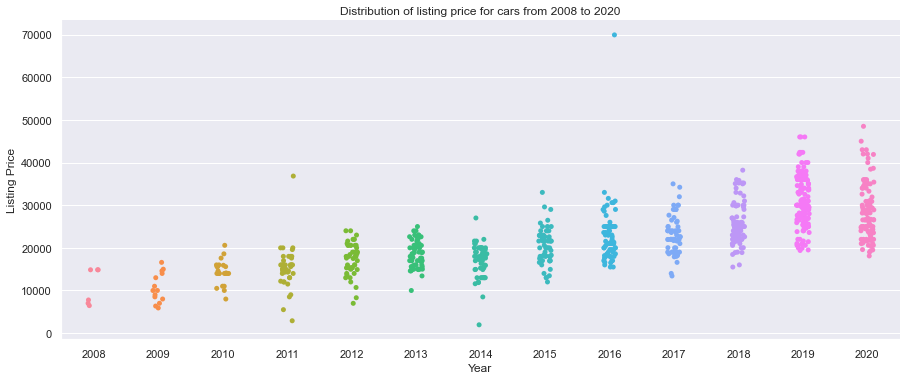

In [24]:
sns \
    .catplot(data = plot_data, x = "Year", y = "Price", aspect = 5/2) \
    .set(xlabel = "Year",
         ylabel = "Listing Price",
         title = "Distribution of listing price for cars from 2008 to 2020")

### From the chart above, Year and Listing Price have a positive relationship; in other words, the latests year (2019 and 2020) are associated with the highest total of listing prices.  However, year 2016 has one car with the highest listing price (~$70,000).

### <span style="color: blue">**3.1.1 Check the outlier** </span>

In [25]:
outlier = data3 \
    .dropna(subset = ["VIN#", "Year"]) \
    .astype({"Year" : int}) \
    .query("(Year == 2016) & (Price >= 60000)")

outlier

Dealer Car Make Car Model    Price  Year    Location  Mileage Doors  \
184       1   Toyota     Camry  69926.0  2016  Lorain, OH  69926.0     4   

    Color Transmission               VIN#            Engine Description  \
184  Gray    Automatic  4T4BF1FK7GR552945  4-Cyl, 2.5 Liter         NaN   

                                    Web link  
184  https://www.carvana.com/vehicle/2485211

### For this outlier, price and mileage has the same value.. After checking on the provided web link, the price should be $19900

### <span style="color: blue">**3.1.2 Data Correction** </span>

In [26]:
data3.loc[184, 'Price'] = 19900

In [27]:
data3

Dealer Car Make   Car Model    Price  Year                    Location  \
0         1   Toyota        Rav4  21300.0  2016            Walnut Creek, CA   
1         1   Toyota        Rav4  10995.0  2009        1125 Detroit Ave, CA   
2         1   Toyota  Highlander  21990.0  2012  Lower Bottoms, Oakland, CA   
3         0   Toyota     Corolla  15590.0  2013                  Pittsburgh   
4         1   Toyota       Camry  19990.0  2012           San Francisco, CA   
..      ...      ...         ...      ...   ...                         ...   
850       1   Toyota  Highlander  14849.0  2008                McMurray, PA   
851       1   Toyota     Corolla  19900.0  2019               Uniontown, PA   
852       1   Toyota       Camry  15335.0  2012               White Oak, PA   
853       0   Toyota        Rav4  28152.0  2020             Murrysville, PA   
854       0   Toyota        Rav4  18863.0  2014                         NaN   

      Mileage Doors                   Color Transmission               VIN#  \
0     90441.0     4                   White    Automatic  2T3WFREV0GW274936   
1    172844.0     4                   White    Automatic  JTMBK31V095081967   
2     75000.0     4                   White    Automatic  5TDBK3EH9CS140312   
3     79767.0     4                  Silver    Automatic  2T1BU4EE6DC074253   
4     76000.0     4                    Blue    Automatic  5TDZA3EH0CS021002   
..        ...   ...                     ...          ...                ...   
850   79824.0     4         Wave Line Pearl    Automatic  JTEES42A982077927   
851   41723.0     4        Black Sand Pearl    Automatic  2T1BURHE9KC168715   
852   71066.0     4  Magnetic Gray Metallic    Automatic  4T4BF1FK7CR274445   
853   39223.0     4                    Gray    Automatic  2T3H1RFV1LC033808   
854   80930.0     4                   Black    Automatic  2T3DFREV9EW220829   

                        Engine  \
0             2.5 L 4-cylinder   
1                V6, 3.5 Liter   
2                V6, 3.5 Liter   
3    1.8-Liter 4-Cylinder DOHC   
4             4-Cyl, 2.7 Liter   
..                         ...   
850               3.5L 6cyl 5A   
851              1.8L 4cyl CVT   
852             178 hp 2.5L I4   
853                        NaN   
854                        NaN   

                                           Description  \
0    The automatic transmission makes driving easie...   
1    Limited Extra Value PKG W/Navigation\rinc: day...   
2    Vehicle Info for Stock# 2001887828\rTrim: Spor...   
3                                                  NaN   
4    Vehicle Info for Stock# 2001946064\rTrim: Spor...   
..                                                 ...   
850  Vehicle Summary\r79,824 Miles\rExterior Color\...   
851  Vehicle Summary\r41,723 Miles\rExterior Color\...   
852  Ash w/Leather Seat Trim, 7.0J x 17 Alloy Wheel...   
853  CLEAN CARFAX/1 OWNER, BLUETOOTH, BACK-UP CAMER...   
854                                                NaN   

                                              Web link  
0    https://sfbay.craigslist.org/eby/ctd/753307708...  
1    https://sfbay.craigslist.org/eby/ctd/753307624...  
2    https://sfbay.craigslist.org/eby/ctd/753332603...  
3    https://www.carvana.com/vehicle/2417328#inspec...  
4    https://sfbay.craigslist.org/sfc/ctd/753333249...  
..                                                 ...  
850  https://www.edmunds.com/toyota/highlander/2008...  
851  https://www.edmunds.com/toyota/corolla/2019/vi...  
852  https://www.cargurus.com/Cars/l-Used-Toyota-Ca...  
853   https://www.carfax.com/vehicle/2T3H1RFV1LC033808  
854   https://www.carfax.com/vehicle/2T3DFREV9EW220829  

[822 rows x 14 columns]

## <span style="color: blue">**3.2 Is there any relationship between Price and Mileage?** </span>

In [28]:
plot_data2 = data3 \
    .dropna(subset = ["VIN#", "Year"]) \
    .astype({"Year" : int}) \
    .loc[:, ["Year", "Car Model", "Price", "Mileage"]] \
    .query("(Year >= 2008) & (Year <= 2020)")

plot_data2

Year   Car Model    Price   Mileage
0    2016        Rav4  21300.0   90441.0
1    2009        Rav4  10995.0  172844.0
2    2012  Highlander  21990.0   75000.0
3    2013     Corolla  15590.0   79767.0
4    2012       Camry  19990.0   76000.0
..    ...         ...      ...       ...
850  2008  Highlander  14849.0   79824.0
851  2019     Corolla  19900.0   41723.0
852  2012       Camry  15335.0   71066.0
853  2020        Rav4  28152.0   39223.0
854  2014        Rav4  18863.0   80930.0

[778 rows x 4 columns]

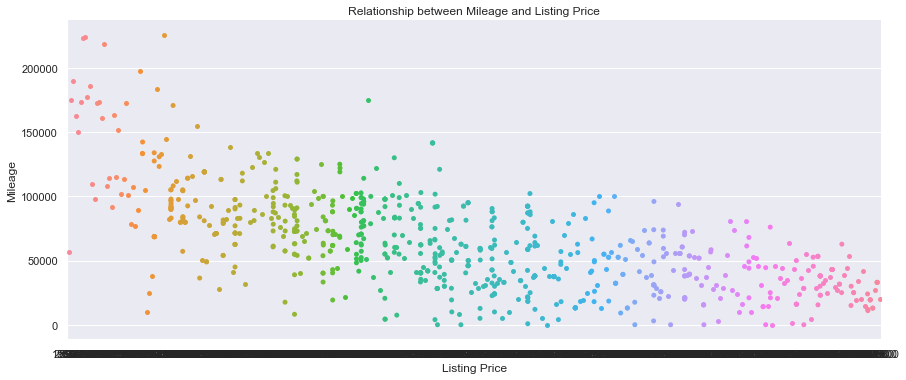

In [29]:
sns \
    .catplot(data = plot_data2, x = "Price", y = "Mileage", aspect = 5/2) \
    .set(xlabel = "Listing Price",
         ylabel = "Mileage",
         title = "Relationship between Mileage and Listing Price")

### From the scatter plot,  it is not easy to find a clear relationship between mileage and price; I am going to add another variable  "Year", to see if it helps.

In [30]:
from mpl_toolkits.mplot3d import Axes3D

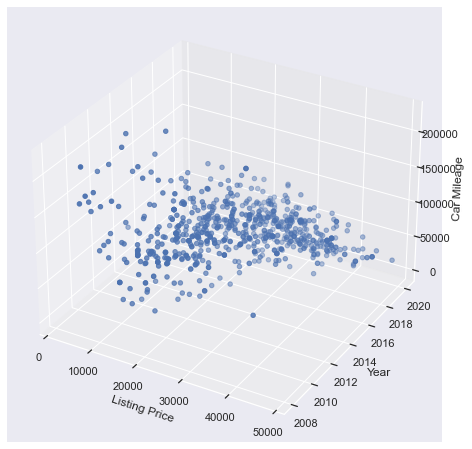

In [31]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = '3d')

x = plot_data2['Price']
y = plot_data2['Year']
z = plot_data2['Mileage']

ax.set_xlabel("Listing Price")
ax.set_ylabel("Year")
ax.set_zlabel("Car Mileage")

ax.scatter(x, y, z)

plt.show()

### From the 3D plot, we can see that: 

-  majority data points are with mileage less than 50,000, with year between 2018 to 2020.
-  At the same year, when the mileage > 50,000, listing price of most cars decrease
-  Given the same mileage, when the year < 2016, most cars' listing prices are less than $20,000

## <span style="color: blue">**3.3 Check relationships among other variables to avoid selection bias** </span>

In [32]:
data4 = data3 \
    .dropna(subset = ["VIN#", "Year"]) \
    .astype({"Year" : int}) \
    .loc[:, ["Car Make", "Year", "VIN#", "Car Model", "Price", "Mileage", "Dealer", "Transmission", "Location", "Doors", "Color", "Engine"]] \
    .query("(Year >= 2008) & (Year <= 2020)")

<AxesSubplot:xlabel='Car Model', ylabel='count'>

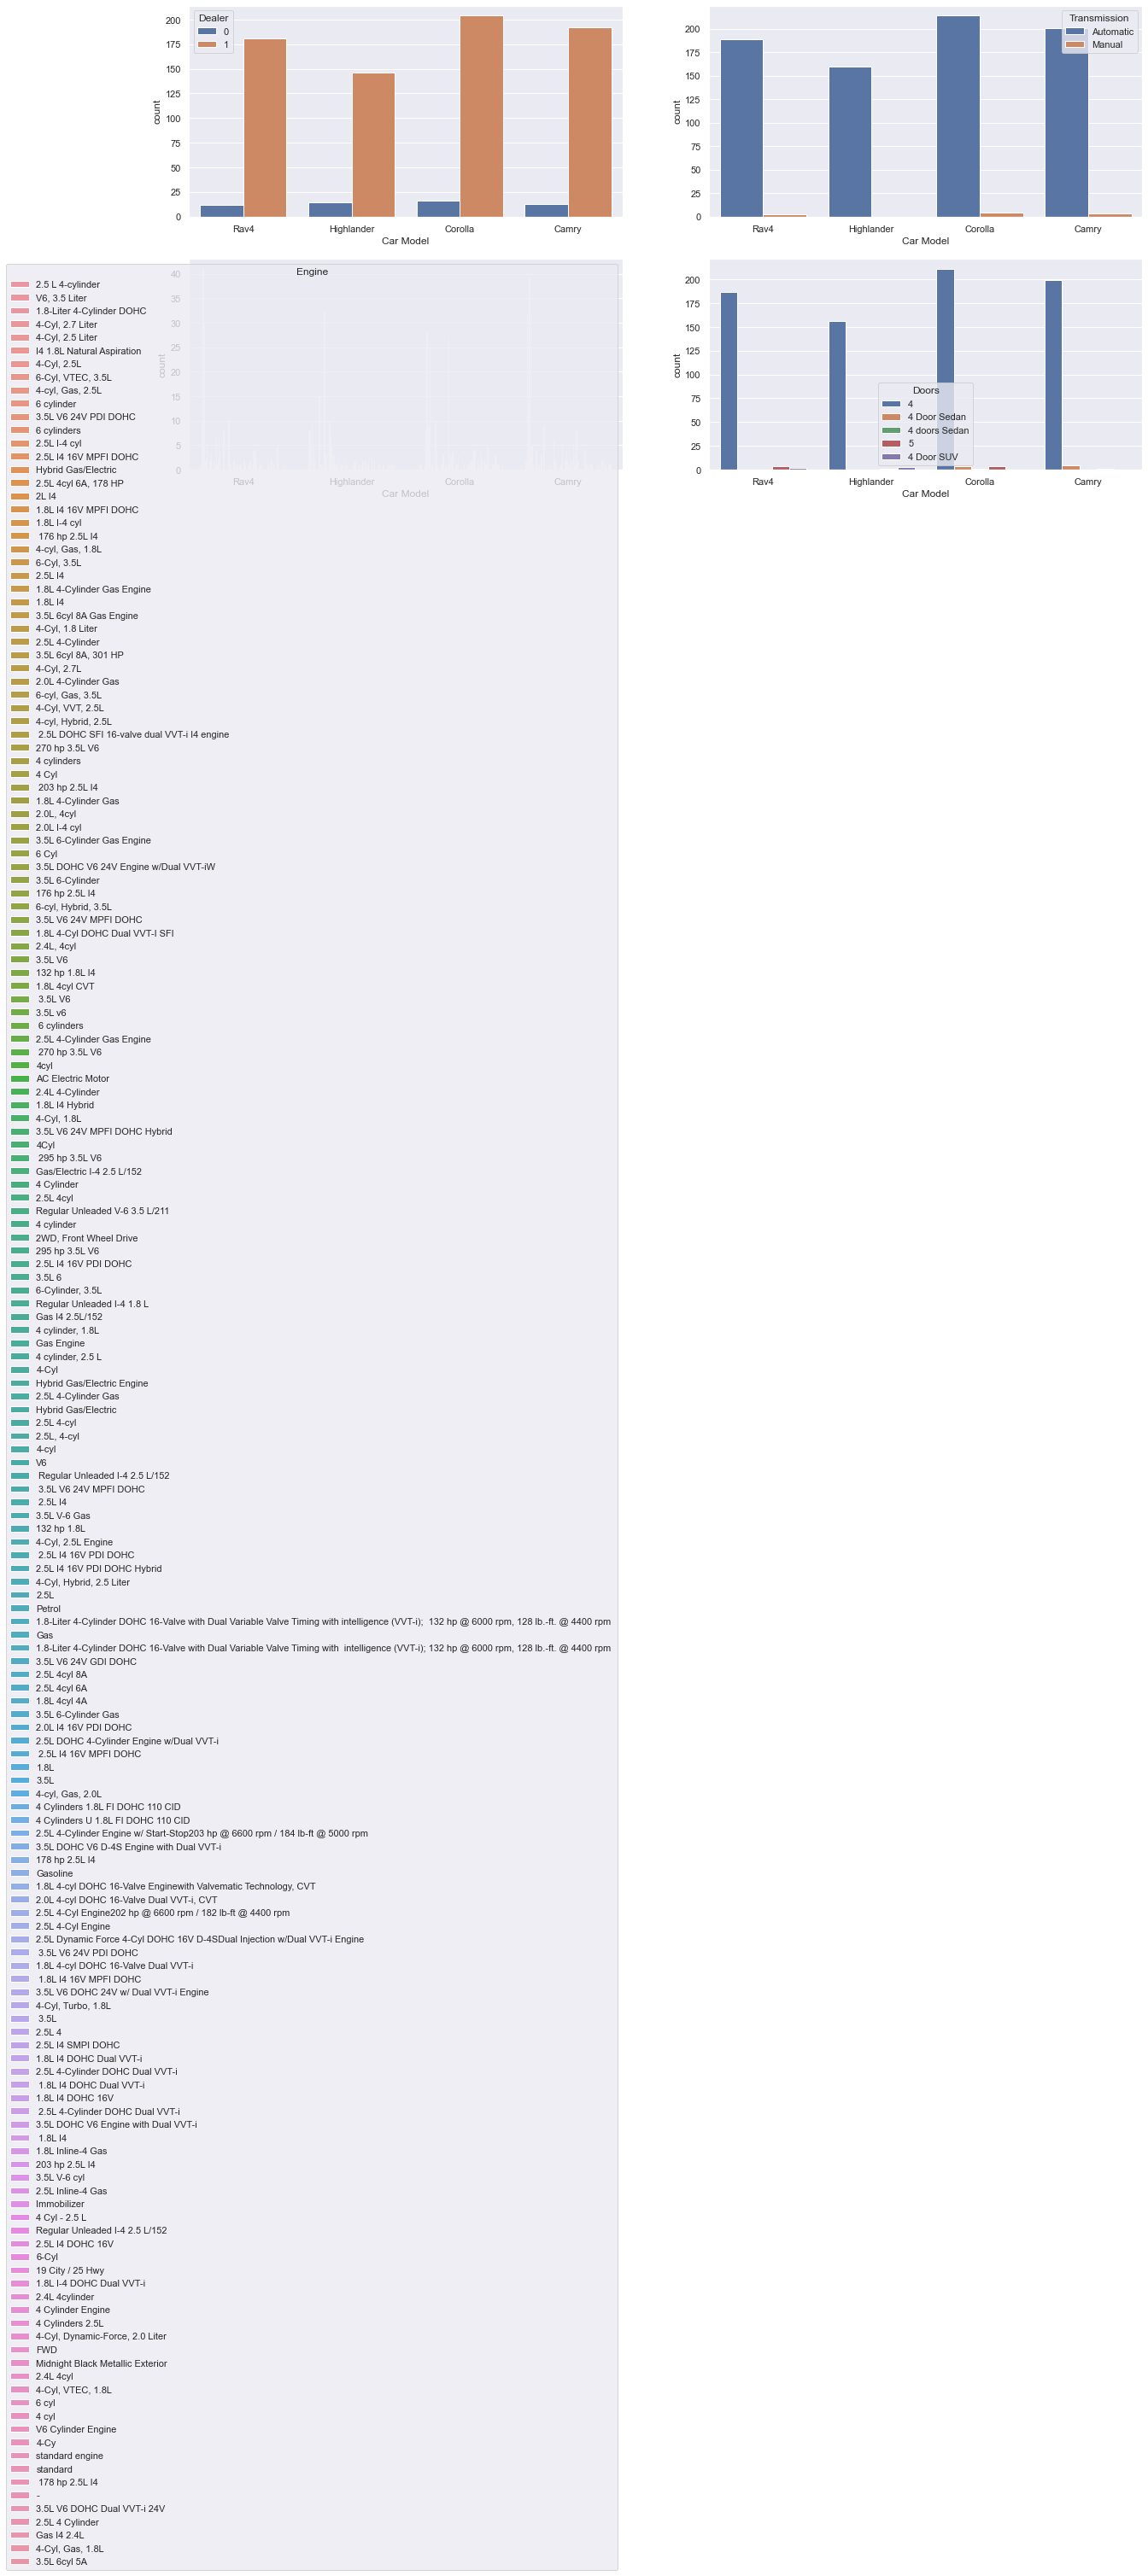

In [33]:
# understand categorical feature
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Car Model', hue='Dealer', data=data4, ax=axss[0][0])
sns.countplot(x='Car Model', hue='Transmission', data=data4, ax=axss[0][1])
sns.countplot(x='Car Model', hue='Engine', data=data4, ax=axss[1][0])
sns.countplot(x='Car Model', hue='Doors', data=data4, ax=axss[1][1])

#### 1st subplot: Most data records are from dealer, and Corolla is the top 1 car model 
#### 2nd subplot: Most cars are automatic
#### 3rd subplot: too many unique values for Engine, and there is no consistent pattern to extract those values. One fix would be filtering the top 10 popular engine (by counts) then analyze further. 

In [34]:
top10Engine = data4 \
    .groupby('Engine', as_index = False) \
    .agg(engine_count = ("Engine", "count")) \
    .nlargest(10,columns = 'engine_count') \
    .merge(data4) \
    .groupby('Engine', as_index = False) \
    .agg(average_price = ("Price", "mean"))
top10Engine

Engine  average_price
0  2.5L 4-Cylinder Gas Engine   26977.823529
1                       4 Cyl   18814.923077
2            4-Cyl, 1.8 Liter   17860.538462
3                 4-Cyl, 1.8L   17334.555556
4            4-Cyl, 2.5 Liter   22232.809524
5                 4-Cyl, 2.5L   21409.618182
6            4-cyl, Gas, 1.8L   20176.571429
7            4-cyl, Gas, 2.5L   25869.428571
8                 6-Cyl, 3.5L   24003.333333
9            6-cyl, Gas, 3.5L   31457.459459

#### 4th subplot: most cars have 4 doors, and value "4 Door Sedan", " 4 Door SUV", "4 doors Sedan" need to be updated to 4

In [35]:
type(data4['Doors'])

pandas.core.series.Series

In [36]:
# check with TA : not sure why below syntax failed to update the value
data4['Doors'].replace(['4 Door Sedan', '4 Door SUV', '4 doors Sedan'], '4', inplace = True)
data4.nunique()

Car Make          1
Year             13
VIN#            584
Car Model         4
Price           342
Mileage         526
Dealer            2
Transmission      2
Location        341
Doors             2
Color           138
Engine          173
dtype: int64

<AxesSubplot:xlabel='Car Model', ylabel='count'>

C:\Users\frede\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\frede\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


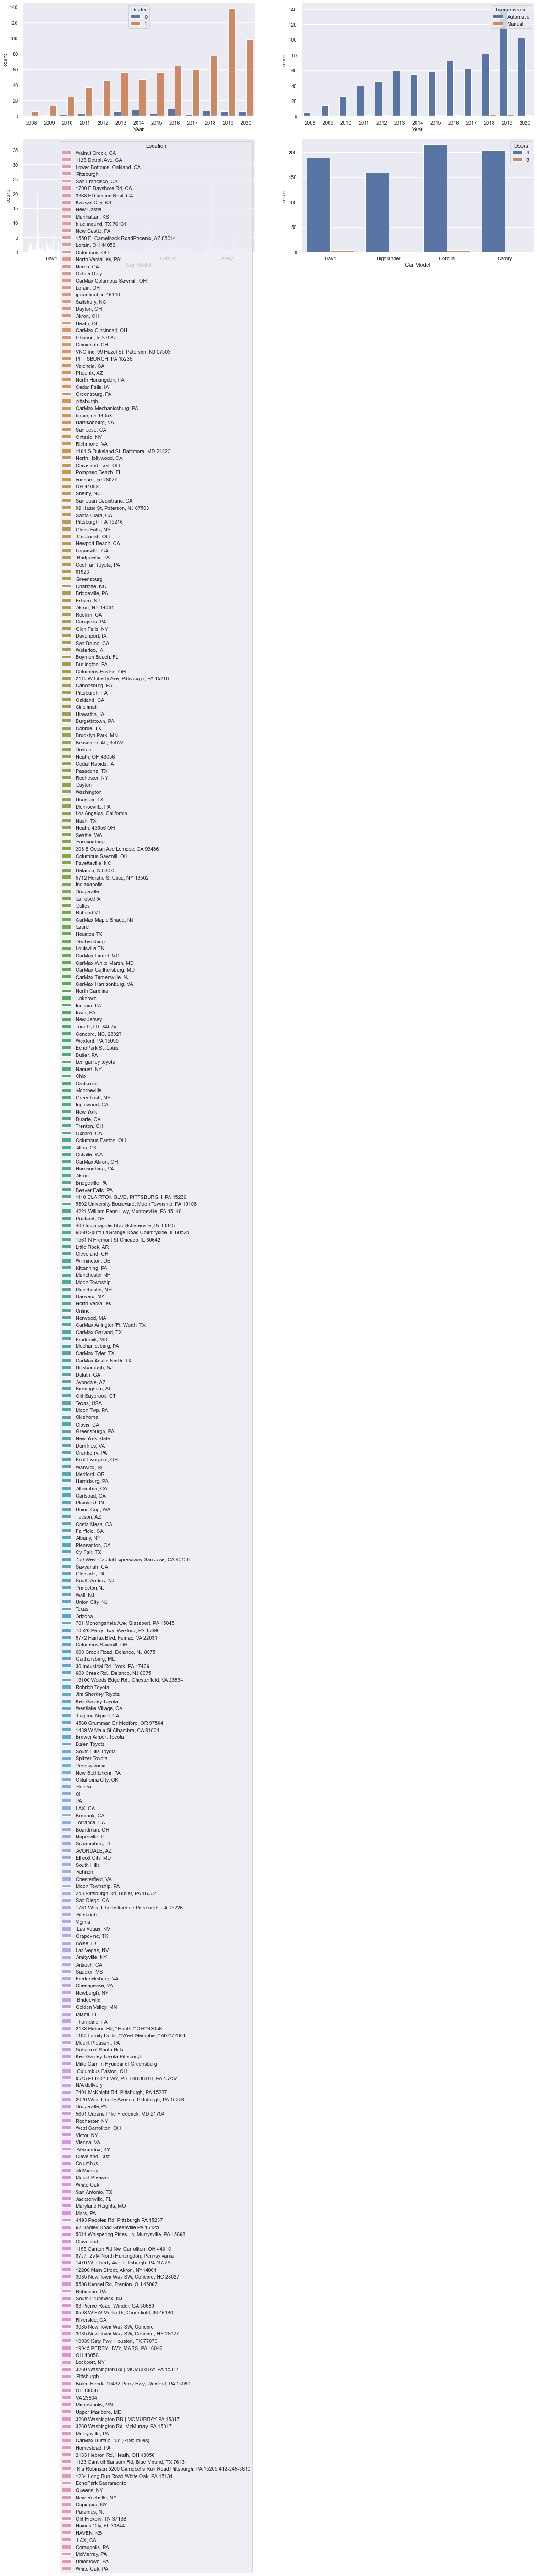

In [37]:
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Year', hue='Dealer', data=data4, ax=axss[0][0])
sns.countplot(x='Year', hue='Transmission', data=data4, ax=axss[0][1])
sns.countplot(x='Car Model', hue='Location', data=data4, ax=axss[1][0])
sns.countplot(x='Car Model', hue='Doors', data=data4, ax=axss[1][1])

#### 1st subplot: Year 2019 has the largest number of dealer ads; Year 2016 have the largest number of individual ads.
#### 2nd subplot: Year 2019 has the most number of automatic cars.
#### 3rd subplot: too many unique values for variable Location. One fix would be extracting states, then analyze further. 

In [38]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="haoyuw2@andrew.cmu.edu")

In [39]:
def extract_clean_address(address):
    try:
        location = geolocator.geocode(address)
        return location.address
    except:
        return ''
data4['CleanAddress'] = data4.apply(lambda x: extract_clean_address(x['Location']) , axis =1  )

# this block's code is based on: https://towardsdatascience.com/transform-messy-address-into-clean-data-effortlessly-using-geopy-and-python-d3f726461225

In [40]:
type(data4["CleanAddress"]) 

pandas.core.series.Series

In [41]:
data4["CleanAddress"]

0      Walnut Creek, Contra Costa County, California,...
1      1125, Detroit Avenue, Four Corners, Concord, C...
2      Lower Bottoms, Oakland, Alameda County, Califo...
3      Pittsburgh, Allegheny County, Pennsylvania, Un...
4      San Francisco, CAL Fire Northern Region, Calif...
                             ...                        
850    McMurray, Washington County, Pennsylvania, Uni...
851    Uniontown, Fayette County, Pennsylvania, Unite...
852    White Oak, Allegheny County, Pennsylvania, 151...
853    Murrysville, Westmoreland County, Pennsylvania...
854    Nanno, Ville d'Anaunia, Comunità della Val di ...
Name: CleanAddress, Length: 778, dtype: object

In [42]:
data4["CleanAddress"].str.split(',', expand = True)

0                          1                           2   \
0     Walnut Creek        Contra Costa County                  California   
1             1125             Detroit Avenue                Four Corners   
2    Lower Bottoms                    Oakland              Alameda County   
3       Pittsburgh           Allegheny County                Pennsylvania   
4    San Francisco   CAL Fire Northern Region                  California   
..             ...                        ...                         ...   
850       McMurray          Washington County                Pennsylvania   
851      Uniontown             Fayette County                Pennsylvania   
852      White Oak           Allegheny County                Pennsylvania   
853    Murrysville        Westmoreland County                Pennsylvania   
854          Nanno            Ville d'Anaunia   Comunità della Val di Non   

                       3                              4               5   \
0           United States                           None            None   
1                 Concord            Contra Costa County      California   
2              California                          94607   United States   
3           United States                           None            None   
4           United States                           None            None   
..                    ...                            ...             ...   
850         United States                           None            None   
851         United States                           None            None   
852                 15131                  United States            None   
853                 15668                  United States            None   
854   Provincia di Trento   Trentino-Alto Adige/Südtirol           38093   

          6               7     8     9     10  
0       None            None  None  None  None  
1      94520   United States  None  None  None  
2       None            None  None  None  None  
3       None            None  None  None  None  
4       None            None  None  None  None  
..       ...             ...   ...   ...   ...  
850     None            None  None  None  None  
851     None            None  None  None  None  
852     None            None  None  None  None  
853     None            None  None  None  None  
854   Italia            None  None  None  None  

[778 rows x 11 columns]

#### Even after expanding the new field CleanAddress, states still appear in different columns. Due to Google Search preference, most data records are with PA, and from earlier profiling, we also see that Pennsylvania is the top 1 state according to this dataset. 

### Suggestions for improvement: 

Before collecting location data, we should either only allow one format, such as "city name, state", or even better way to solve this is to separate address component into individual fields: column1_City, column2_State, and column3_Country. 
We can also limit the length of column2_State to 2 to achieve a consistent format.  

Similar rules can be applied to data fields - Color.For example, the survey can be designed as Color1, Color2, Color3, Color4, Color5, Color6, and so on. 
For Engine, specify the required format and limit the length of the column would help to collect more clean and coherent data.

#### 4th subplot: Only model Rav4 and Corolla have 5 doors.

## <span style="color: blue">**3.4 Let us add categorical variable Car Model to see if there is any relationship between car model and price over years** </span>

In [43]:
plot_data3 = data4 \
    .groupby('Car Model', as_index = False) \
    .agg(model_count = ("Car Model", "count")) \
    .nlargest(5,columns = 'model_count') \
    .merge(data4) \
    .groupby(["Car Model", 'Year'], as_index = False) \
    .agg(average_price = ("Price", "mean"))
plot_data3

Car Model  Year  average_price
0        Camry  2008    7385.500000
1        Camry  2009    8220.750000
2        Camry  2010   14256.666667
3        Camry  2011   17329.733333
4        Camry  2012   15300.105263
5        Camry  2013   18294.000000
6        Camry  2014   15399.583333
7        Camry  2015   19556.125000
8        Camry  2016   21064.400000
9        Camry  2017   20880.550000
10       Camry  2018   25518.645161
11       Camry  2019   27998.266667
12       Camry  2020   28864.807692
13     Corolla  2008    6450.000000
14     Corolla  2009   11050.500000
15     Corolla  2010   13590.733333
16     Corolla  2011   13515.785714
17     Corolla  2012   15559.500000
18     Corolla  2013   16249.965517
19     Corolla  2014   16442.714286
20     Corolla  2015   16137.846154
21     Corolla  2016   17610.000000
22     Corolla  2017   20016.214286
23     Corolla  2018   21255.190476
24     Corolla  2019   23660.900000
25     Corolla  2020   23483.062500
26  Highlander  2008   14849.000000
27  Highlander  2010   17428.000000
28  Highlander  2011   18091.166667
29  Highlander  2012   20384.470588
30  Highlander  2013   21710.846154
31  Highlander  2014   24494.000000
32  Highlander  2015   25487.692308
33  Highlander  2016   27069.590909
34  Highlander  2017   27735.000000
35  Highlander  2018   33228.000000
36  Highlander  2019   36879.976744
37  Highlander  2020   39765.538462
38        Rav4  2009   13792.500000
39        Rav4  2010   14860.000000
40        Rav4  2011   11443.833333
41        Rav4  2012   17914.200000
42        Rav4  2013   19253.388889
43        Rav4  2014   19168.266667
44        Rav4  2015   21238.058824
45        Rav4  2016   22065.666667
46        Rav4  2017   25979.562500
47        Rav4  2018   26280.684211
48        Rav4  2019   30714.431373
49        Rav4  2020   33725.705882

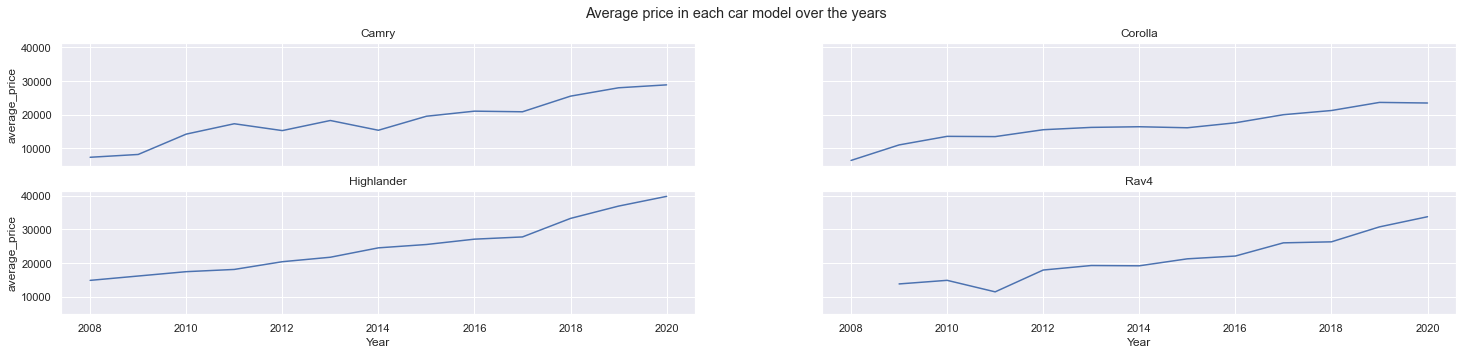

In [44]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (25, 5), sharex = True, sharey = True)
fig.suptitle("Average price in each car model over the years")
# go through dataset once for the groupby
groupby_plot_data = plot_data3.groupby("Car Model")

# looping 10 times
for index, model in enumerate(plot_data3["Car Model"].unique()):
    # just call .get_group, no need to go through dataset again
    df = groupby_plot_data.get_group(model)
    row, col = index // 2, index % 2
    ax[row][col].set_title(model)
    ax[row][col].xaxis.set_major_locator(MaxNLocator(integer = True))
    sns.lineplot(
        data = df,
        x = "Year",
        y = "average_price",
        ax = ax[row][col]
    )
# this section's code is adapted from the class' demo.

### The chart above cleary shows that all 4 car models share the same positive trend between price and year; and Highlander is the one which had the highest average price by 2020 vs Corolla had the lowest average price by 2020.


### <span style="color:blue"> **3.4.1 Which car model has the highest average listing price for each year from 2018 to 2020** ?</span>

In [45]:
CarModel = data4['Car Model'].unique()
CarModel

array(['Rav4', 'Highlander', 'Corolla', 'Camry'], dtype=object)

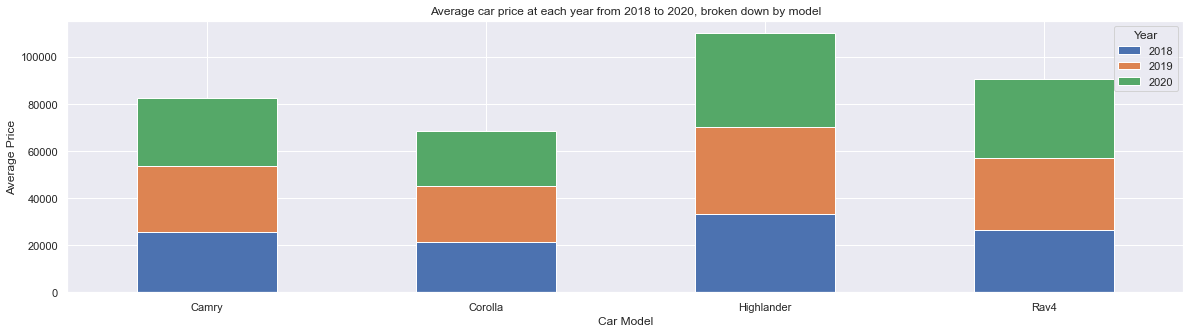

In [46]:
plot_data4 = data4 \
    .query("(Year >= 2018) & (Year <= 2020)") \
    .groupby(["Year", "Car Model"], as_index = False) \
    .agg(average_price = ("Price", "mean")) \
    .astype({"Year" : int}) \
    .pivot_table(index = "Car Model", columns = "Year", values = "average_price")

plot_data4 \
    .plot(kind = "bar", stacked = True, figsize = (20, 5), rot = 0) \
    .set(xlabel = "Car Model",
         ylabel = "Average Price",
         title = "Average car price at each year from 2018 to 2020, broken down by model");

# this section's code is adapted from this class demo.

### Highlander is the model with the highest average price from 2018 to 2020, followed by Rav4. 

### <span style="color:blue"> **3.4.2 Which car model has the most significant percentage change per average price from 2018 to 2020?** </span>

In [47]:
plot_data1 = data4 \
    .query("(Year >= 2018) & (Year <= 2020)") \
    .groupby(["Year", "Car Model"], as_index = False) \
    .agg(average_price = ("Price", "mean")) \
    .astype({"Year" : int}) \
    .pivot_table(index = "Year", columns = "Car Model", values = "average_price")\
    .pct_change(2)
plot_data1

Car Model     Camry   Corolla  Highlander      Rav4
Year                                               
2018            NaN       NaN         NaN       NaN
2019            NaN       NaN         NaN       NaN
2020       0.131126  0.104815    0.196748  0.283289

### From 2018 to 2020, model Rav4 had the most significant percentage increase per average price (28.3%) , followed by model Highlander (19.7%). 

### <span style="color:blue"> **3.4.3 Does any car model experience negative percentage change per average price from 2018 to 2020?** </span>

In [48]:
plot_data1_1 = data4 \
    .query("(Year >= 2018) & (Year <= 2020)") \
    .groupby(["Year", "Car Model"], as_index = False) \
    .agg(average_price = ("Price", "mean")) \
    .astype({"Year" : int}) \
    .pivot_table(index = "Year", columns = "Car Model", values = "average_price")\
    .pct_change(1)
plot_data1_1

# .pct_change() is based on https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html 

Car Model     Camry   Corolla  Highlander      Rav4
Year                                               
2018            NaN       NaN         NaN       NaN
2019       0.097169  0.113182    0.109907  0.168707
2020       0.030950 -0.007516    0.078242  0.098041

### The above YOY average price change shows us an interesting fact that Corolla is the only model experienced negative percentage change from 2019 to 2020.

### <span style="color:blue"> 3.4.4 From 2008 to 2020, are dealers' price higher than individuals' listing price ? </span>

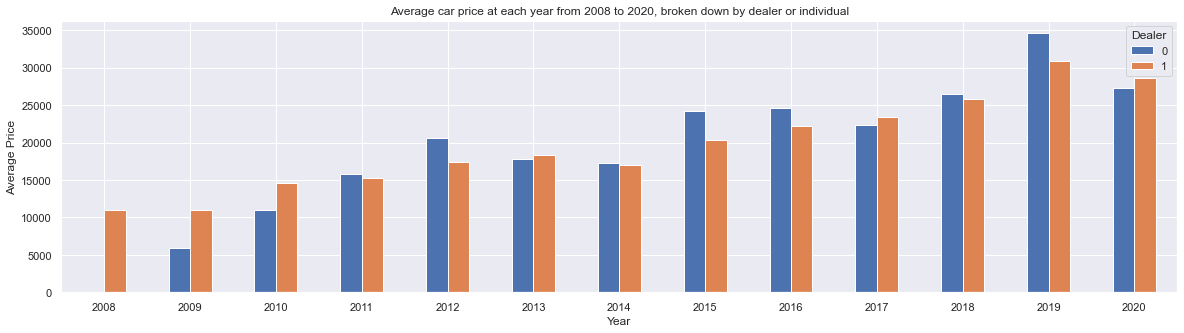

In [49]:
plot_data5 = data4 \
    .query("(Year >= 2008) & (Year <= 2020)") \
    .groupby(["Year", "Dealer"], as_index = False) \
    .agg(average_price = ("Price", "mean")) \
    .astype({"Year" : int}) \
    .pivot_table(index = "Year", columns = "Dealer", values = "average_price")

plot_data5 \
    .plot(kind = "bar", stacked = False, figsize = (20, 5), rot = 0) \
    .set(xlabel = "Year",
         ylabel = "Average Price",
         title = "Average car price at each year from 2008 to 2020, broken down by dealer or individual");

### In 2008, no individual car listing from this data set. Average price from individuals' are higher than dealers' in the following years:  2011, 2012, 2014, 2015, 2016, 2018 and 2019.

# <span style="color: blue">**4. Export Cleaned Data** </span>

In [53]:
from pathlib import Path  
filepath = Path('C:\\Users\\frede\\Desktop\\CMU\\Interactive Data Science\\Assignment\\HW2\\cleaned car data.csv')  
data5.to_csv(filepath, index=False)  